Episode 1000/500000

c:\Users\vasub\AppData\Local\Programs\Python\Python312\Lib\site-packages\gym\utils\passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


Episode 500000/500000

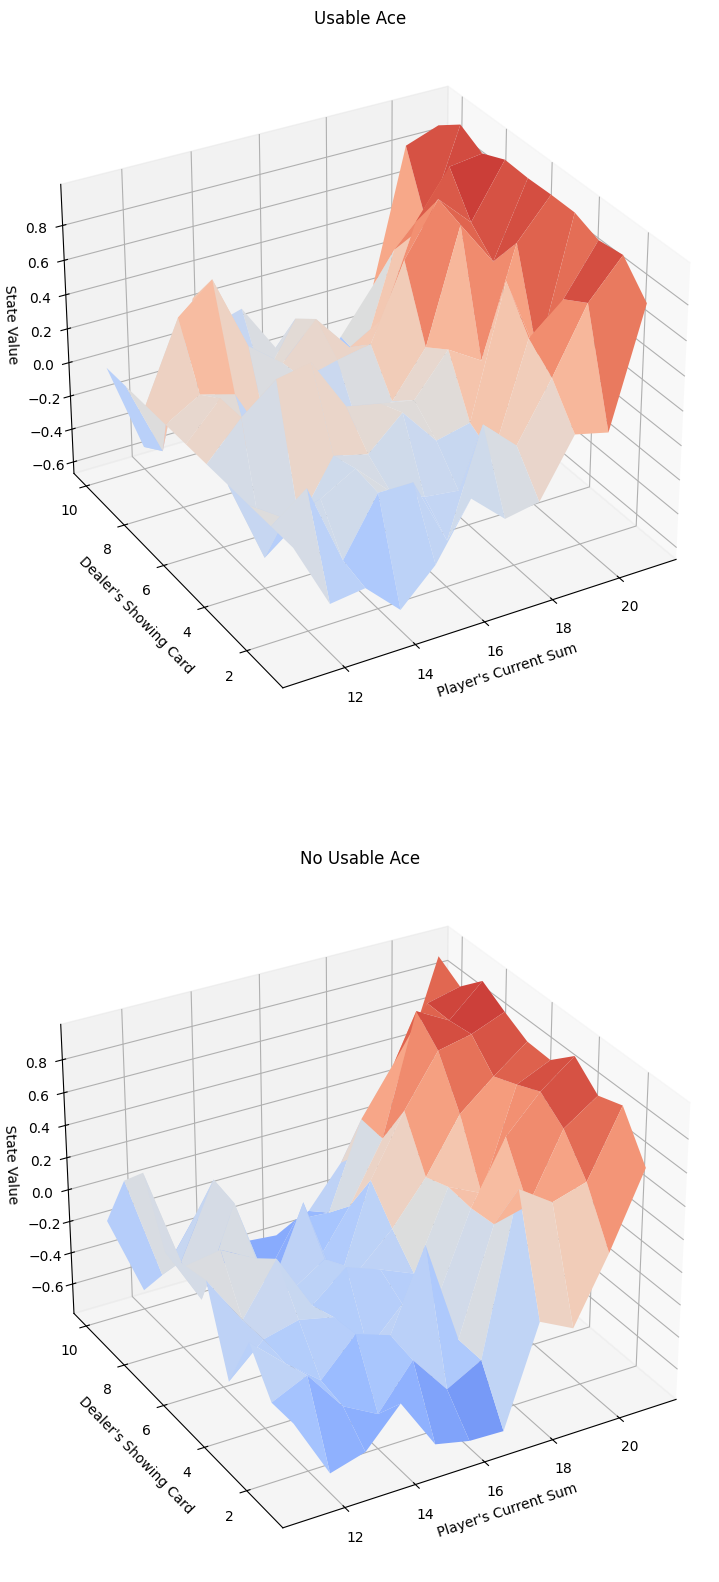

In [2]:
import urllib.request

url = "https://raw.githubusercontent.com/udacity/deep-reinforcement-learning/master/monte-carlo/plot_utils.py"
urllib.request.urlretrieve(url, "plot_utils.py")

import gym
import numpy as np
import sys
from collections import defaultdict
from plot_utils import plot_blackjack_values

env = gym.make('Blackjack-v1')

def mc_control(env, num_episodes, alpha=0.1, gamma=1.0, epsilon=0.1):
    nA = env.action_space.n
    Q = defaultdict(lambda: np.zeros(nA))

    def epsilon_greedy_policy(state):
        A = np.ones(nA) * (epsilon / nA)
        best_action = np.argmax(Q[state])
        A[best_action] += (1.0 - epsilon)
        return A

    for i_episode in range(1, num_episodes + 1):
        if i_episode % 1000 == 0:
            print(f"\rEpisode {i_episode}/{num_episodes}", end="")
            sys.stdout.flush()

        episode = []
        state, _ = env.reset()
        done = False

        while not done:
            action_probs = epsilon_greedy_policy(state)
            action = np.random.choice(np.arange(nA), p=action_probs)
            next_state, reward, done, _, _ = env.step(action)
            episode.append((state, action, reward))
            state = next_state

        states, actions, rewards = zip(*episode)
        G = 0

        for t in reversed(range(len(episode))):
            G = gamma * G + rewards[t]
            Q[states[t]][actions[t]] += alpha * (G - Q[states[t]][actions[t]])

    policy = {state: np.argmax(Q[state]) for state in Q}
    return policy, Q

policy, Q = mc_control(env, 500000)
V = dict((k, np.max(v)) for k, v in Q.items())
plot_blackjack_values(V)
